<a href="https://colab.research.google.com/github/OyewoleRasheed/Rawsheedlearns/blob/main/Human_Activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
#read train and test dataset
train= pd.read_csv("/train-1.csv")
test = pd.read_csv("/test.csv")

In [13]:
train.shape

(7352, 564)

In [6]:
train.shape

(3523, 563)

In [25]:
train["DATA"] = "Train"
test["DATA"] = "Test"
combined_d = pd.concat([train, test], axis =0).reset_index(drop= True)

In [26]:
combined_d.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,DATA
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,Train
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,Train
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,Train
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,Train
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,Train


In [28]:
 combined_d["subject"] = "#" + combined_d["subject"].astype(str)

In [31]:
combined_d.dtypes.value_counts()

float64    561
object       3
Name: count, dtype: int64

In [34]:
def basic_details(df):
  a = pd.DataFrame()
  a["Missing Value"] = df.isnull().sum()
  a["Unique Value"] = df.nunique()
  a["dtypes"] = df.dtypes
  return a

In [35]:
basic_details(combined_d)

,Missing Value,Unique Value,dtypes
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,object
Activity,0,6,object


<BarContainer object of 6 artists>

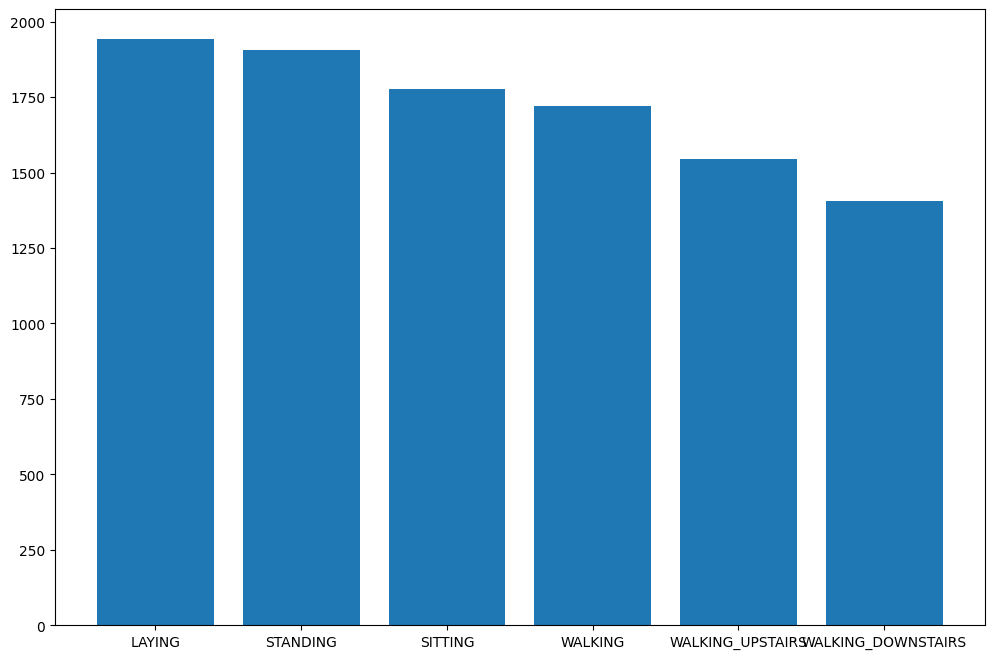

In [41]:
activity = combined_d['Activity']
label_counts= activity.value_counts()
plt.figure(figsize = (12,8))
plt.bar(label_counts.index, label_counts)

In [43]:
Data= combined_d["DATA"]
Subject = combined_d["subject"]
train = combined_d.copy()
train = train.drop(["DATA","subject","Activity"], axis =1)

In [44]:
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(train)


In [45]:
from sklearn.decomposition import PCA
pca= PCA(n_components= 0.9, random_state= 42)
train= pca.fit_transform(train)

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(train, activity, test_size= 0.2, random_state = 42)


In [46]:
num_folds=10
seed =0
scoring= 'accuracy'
results ={}
accuracy ={}

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import KFold, cross_val_score
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors = 8,p=1, weights= "distance" )

In [53]:
cross_val = cross_val_score(model, X_train, y_train, cv= 10, scoring= scoring)
results["GSCV"] = (cross_val.mean(), cross_val.std())

In [54]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [55]:
accuracy["GSCV"] = accuracy_score(y_test, y_predict)
print(classification_report(y_test, y_predict))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       406
           SITTING       0.90      0.85      0.88       377
          STANDING       0.85      0.90      0.88       354
           WALKING       0.98      0.99      0.99       369
WALKING_DOWNSTAIRS       0.99      0.96      0.98       284
  WALKING_UPSTAIRS       0.97      0.99      0.98       270

          accuracy                           0.95      2060
         macro avg       0.95      0.95      0.95      2060
      weighted avg       0.95      0.95      0.95      2060



<Axes: >

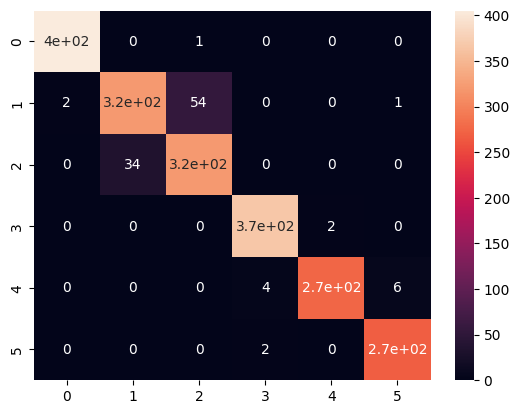

In [58]:
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True)